# Домашнее задание 8

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 21 апреля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_8

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим билинейную седловую задачу:
\begin{equation}
\min_{x \in [-10; 10]^d} \max_{y \in [-10; 10]^d} f(x,y) = (x-b_x)^T A (y - b_y) + \frac{\lambda}{2}\| x - b_x\|^2 - \frac{\lambda}{2}\| y - b_y\|^2,
\end{equation}
где в качестве матрицы $A$ - случайно сгенерированная матрица с $L =1000$, $\mu = 0.01$, $d = 100$, $b_x$ и $b_y$ - случайные векторы c компонентами из отрезка $[-10; 10]$, $\lambda = 1$.

__(а)__ Какое решение у данной задачи? Является ли данная задача сильно выпуклой по $x$ и сильно вогнутой по $y$? Если да, то чему равна константа сильной выпуклости? Является ли оператор, соотвествующего это задаче вариационного неравенства, сильно монотонным? Липшицевым? Чему равны $L$ и $\mu$ для данного оператора? 

$\frac{\partial f}{\partial x}f(x,y) = A(y-b_y)+\lambda (x-b_x)=A(y-b_y)+ (x-b_x)$

$\frac{\partial f}{\partial y}f(x,y) = A^T(x-b_x)-\lambda (y-b_y) = A^T(x-b_x)- (y-b_y)$

$\frac{\partial f}{\partial x}f(x,y) = \frac{\partial f}{\partial y}f(x,y) =0$ при $AA^T(x-b_x)+(x-b_x)=0$
$A$ - случайно сгенерированная, поэтому $x-b_x=0$ и $x=b_x$
Тогда $y=b_y$

$\frac{\partial^2 f}{\partial x^2} = 0 + \frac{\lambda}{2}\cdot 2+0 = \lambda$

$H_x = \lambda = 1$, 
$H_y = 1$

Младшее значение Гессиана 1, поэтому оператор сильно монотонный.

Липшшецевость оператора:
Сначала оценим $\|F(z)\|^2=\|\nabla_x f(x,y)\|^2+\|\nabla_y f(x,y)\|^2 = \|A(y - b_y) + \lambda (x - b_x)\|^2 + \|A^T(x - b_x) - \lambda (y - b_y)\|^2$

$L$ - максимальное собственное значение Гессиана

$||F(z_1)|| - ||F(z_2)|| \leq ||F(z_1) - F(z_2)|| \leq L||z_1 - z_2||$, поэтому функцию $\|F(z)\|$ можно использовать для оценки $L$

Гессиан примерно равен 1000

__(б)__ Решите данную задачу с помощью метода градиентного спуска(подъема) с проекцией и с помощью метода Экстраградиента с проекцией(смотри Секцию 3.3 [статью](https://arxiv.org/pdf/1802.10551.pdf)). Для начала попробуйте теоретические шаги для данных методов. Далее подберите шаг для наилучшей сходимости. Постройте график сходимости (относительное расстояние до решения по аргументу от числа подсчетов градиентов). На графике должно быть 4 линии, по две на каждый из методов. Сделайте вывод.

Проектируем на куб размера 20

В качестве критерия использовано $\|z-z*\|$, отнормированный по начальному значению, то есть $\frac{\|z-z^*\|}{\|z_0-z^*\|}$

В теории для градиентного спуска с проекцией шаг $1/L^2$, у Экстраградиента с проекцией $1/4L$

При экспериментах было выяснено, что для градиентного спуска с проекцией шаг $10/L^2$.
Для экстраградиента с проекцией шаг $1/L$

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math 
import time
%matplotlib inline
import scipy.stats
import random

In [2]:
def generate_matrix(d, m, L):
    D = (L-m)*np.random.random_sample(d) + m
    #print(D)
    D[0] = d
    D[1] = m
    D = np.diag(D)
    S = scipy.stats.ortho_group.rvs(d) 
    #print(S)
    return S@D@S.T

lamb = 1
L = 1000
mu = 1
d = 100
sigma = 10
m = 0
N = 10000
n=10

A=generate_matrix(d, mu, L)
b_x = np.random.normal(m, sigma, d)
b_y = np.random.normal(m, sigma, d)
  


In [3]:
def grad_f_x(A, b_x, b_y, lamb, x, y):
    res1 = A@(y - b_y)
    res2 = lamb*(x - b_x)
    #print(res1)
    return res1+res2

def grad_f_y(A, b_x, b_y, lamb, x, y):
    return grad_f_x(A.T, b_y, b_x, lamb, y, x)

In [4]:
def grad_descent_step(x, y, learning_rate, iter_number):
    x1 = x - learning_rate*grad_f_x(A, b_x, b_y, lamb, x, y)
    y1 = y + learning_rate*grad_f_y(A, b_x, b_y, lamb, x, y)
    return x1, y1

def Proj(x):
    for i in range(len(x)): 
        if(x[i] > 10): 
            x[i] = 10 
        elif(x[i] < -10): 
            x[i] = -10 
    return x

criterion1 = []
grad_num1 = []
def grad_descent_proj(x_0, y_0, learning_rate, iter_number):
    x = x_0
    y = y_0
    grad_num_count = 0
    crit0 = (np.linalg.norm(x_0 - b_x)**2 + np.linalg.norm(y_0 - b_y)**2)
    for _ in range(iter_number):
        x1, y1 = grad_descent_step(x, y, learning_rate, iter_number)
        grad_num_count +=2
        x=Proj(x1)
        y=Proj(y1)
        
        criterion1.append((np.linalg.norm(x - b_x)**2 + np.linalg.norm(y - b_y)**2)/crit0)
        grad_num1.append(grad_num_count)
    return (x,y)



criterion2 = []
grad_num2 = []
def extragrad_descent(x_0, y_0, learning_rate, iter_number):
    x = x_0
    y = y_0
    grad_num_count = 2
    crit0 = (np.linalg.norm(x_0 - b_x)**2 + np.linalg.norm(y_0 - b_y)**2)
    
    for _ in range(iter_number):
        x1, y1 = grad_descent_step(x, y, learning_rate, iter_number)
        grad_num_count +=2
        x1=Proj(x1)
        y1=Proj(y1)
        
        x = Proj(x - learning_rate*grad_f_x(A, b_x, b_y, lamb, x1, y1))
        y = Proj(y + learning_rate*grad_f_y(A, b_x, b_y, lamb, x1, y1))
        grad_num_count +=2
        
        criterion2.append((np.linalg.norm(x - b_x)**2 + np.linalg.norm(y - b_y)**2)/crit0)
        grad_num2.append(grad_num_count)
    return x, y

Text(0.5, 0, 'Подсчет градиента')

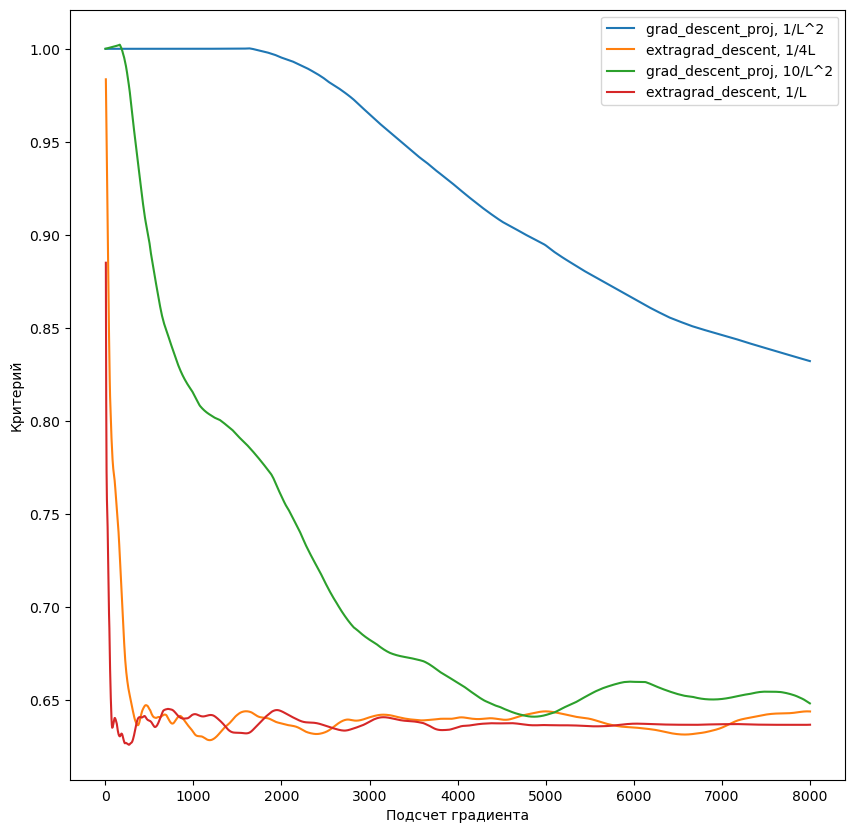

In [5]:
plt.figure(figsize=(10, 10))

iter_number = 2000

criterion1 = []
grad_num1 = []
x, y = grad_descent_proj([0]*d,[0]*d, 1/L/L, iter_number*2)
plt.plot(grad_num1, criterion1,  label = "grad_descent_proj, 1/L^2")

criterion2 = []
grad_num2 = []
x, y = extragrad_descent([0]*d,[0]*d, 1/4/L, iter_number)
plt.plot(grad_num2, criterion2,  label = "extragrad_descent, 1/4L")

criterion1 = []
grad_num1 = []
x, y = grad_descent_proj([0]*d,[0]*d, 10/L/L, iter_number*2)
plt.plot(grad_num1, criterion1,  label = "grad_descent_proj, 10/L^2")

criterion2 = []
grad_num2 = []
x, y = extragrad_descent([0]*d,[0]*d, 1/L, iter_number)
plt.plot(grad_num2, criterion2,  label = "extragrad_descent, 1/L")


plt.legend()

plt.ylabel('Критерий')
plt.xlabel('Подсчет градиента')

## Задача 2

Теперь рассмотрим билинейную задачу на симплексе. Описание задачи возьмите из [лекций](https://www2.isye.gatech.edu/~nemirovs/BrazilTransparenciesJuly4.pdf) - Слайд 125 "How it Works: Policeman vs. Burglar" и следующий.

__(а)__ Сгенерируйте матрицу для данной задачи размера $n=10$ c $\theta = 1$.

В лекциях $A_{ij} =w_i(1-exp(-\theta dist(i,j)))=w_i(1-exp(-\theta |i-j|))$

In [6]:
#ответ

#Сгенерируем случайно, на сетке 5*5 10 домов с прибылью за них и создадим матрицу А
n = 10
d = 10*10

B = np.zeros((n,n))
for i in range(10):
    for j in range(10):
        B[i][j] = min(i,j,9-i,9-j) + 2 * random.random()


A = np.zeros((n*n, n*n))
for i in range(n*n):
    for j in range(n*n):
        dist = abs(i//n - j//n) + abs(i%n - j%n)
        A[i][j] = B[i//n][i%n] * (1 - np.exp(-dist))
print(A)

[[0.         1.14753953 1.56969574 ... 1.81538061 1.81538074 1.81538078]
 [0.57034541 0.         0.57034541 ... 0.90227288 0.90227306 0.90227312]
 [1.57289857 1.149881   0.         ... 1.81908344 1.8190844  1.81908475]
 ...
 [0.23013831 0.23013827 0.23013815 ... 0.         0.14547518 0.1989925 ]
 [1.43293597 1.43293587 1.43293559 ... 0.90578833 0.         0.90578833]
 [1.99075306 1.99075301 1.99075287 ... 1.72133396 1.25839596 0.        ]]


__(б)__ Для данной задачи предложите модификацию метода Экстраградиента, которая учитывает, что задача решается на симплексе. В этом может помочь [статья](https://arxiv.org/pdf/0809.0815.pdf) (смотри Секцию 3.3). Реализуйте данный метод.

В статье Юдитского prox-mapping $(P_z(\xi))_j=(\sum\limits_{i=1}^N z_i \exp \{-\xi_i\})^{-1}z_j exp\{-\xi_j\}$
Подставили в алгоритм:
$(P_{r_{\tau - 1}}(\xi))_j=(\sum\limits_{i=1}^N (r_{\tau - 1})_i \exp \{-\xi_i\})^{-1}(r_{\tau - 1})_j exp\{-\xi_j\}$ 

In [11]:
#ответ
def crit(x, y):
    return np.dot(x - b_x, x - b_x) + np.dot(y - b_y, y - b_y)


def gradf_x(y):
    return y.T @ A

def gradf_y(x):
    return - A @ x

def Pr(r, x):
    p = np.zeros(d)
    temp = 0.0
    for i in range(d):
        temp += r[i] * np.exp(-x[i])
    temp = 1/temp
    for i in range(d):
        p[i] = temp * (r[i]*np.exp(-x[i]))
    return p


def error_func(x, y):
    res = 0
    Ax = A @ x
    yA = y.T @ A
    for i in range(d):
        for j in range(d):
            if (Ax[i] - yA[j] > res):
                res = Ax[i] - yA[j]
    return res

criterion1=[]
def PB_descent(learning_rate, iter_number):
    x = np.ones(d)
    y = np.ones(d)
    x1 = np.zeros(d)
    y1 = np.zeros(d)
    for i in range(iter_number):
        x1 = Pr(x, learning_rate*gradf_x(y))
        y1 = Pr(y, learning_rate*gradf_y(x))
        x = Pr(x, learning_rate*gradf_x(y1))
        y = Pr(y, learning_rate*gradf_y(x1))
        criterion1.append(error_func(x, y))
    return  x, y

def pr(x):
    u = np.sort(x)
    u = u[::-1]
    r = 0
    s = 0
    for i in range(len(u)):
        s += u[i]
        r = i + 1
        if ((u[i] + ((1 - s) / r)) <= 0):
            s -= u[i]
            r -= 1
            break
    l = (1 - s) / r
    y = []
    for i in x:
        y.append(max(i + l, 0))
    return np.array(y)

criterion2=[]
def extragrad_descent_2(learning_rate, iter_number):
    x = np.zeros(d)
    y = np.zeros(d)
    y1 = np.zeros(d)
    x1 = np.zeros(d)
    gr_x = (np.dot(A, (y - b_y)) + (x - b_x))
    gr_y = (np.dot((b_x - x).T, A) + (y - b_y))
    
    for i in range(iter_number):
        x = pr(x1 - learning_rate * gr_x)
        y = pr(y1 - learning_rate * gr_y)
        gr_x = gradf_x(y1)
        gr_y = gradf_y(x1)
        x1 = pr(x1 - learning_rate * gr_x)
        y1 = pr(y1 - learning_rate * gr_y)
        criterion2.append(error_func(x1, y1))
    return x, y

criterion3=[]
def grad_descent_proj_2(learning_rate, iter_number):
    xk = np.zeros(d)
    yk = np.zeros(d)
    z0 = crit(xk, yk)
    for i in range(iter_number):
        tx = gradf_x(yk)
        ty = gradf_y(xk)
        xk = pr(xk - learning_rate * tx)
        yk = pr(yk - learning_rate * ty)
        criterion3.append(error_func(xk, yk))
    return xk, yk

__(в)__ Решите билинейную задачу на симплексе с помощью нового метода и методов из Задачи 1. Как будете измерять сходимость? Возможно, в работах, из которых были взяты методы, найдется ответ. Постройте график сходимости. Визуализирйте полученный ответ, как это сделано в файле с лекциями. Сделайте вывод.  

Критерий - функция ошибки $\max\limits_{y\in Z} f(xk, y) - \min\limits_{x\in Z} f(x,yk)$

In [8]:
iter_number = 5000

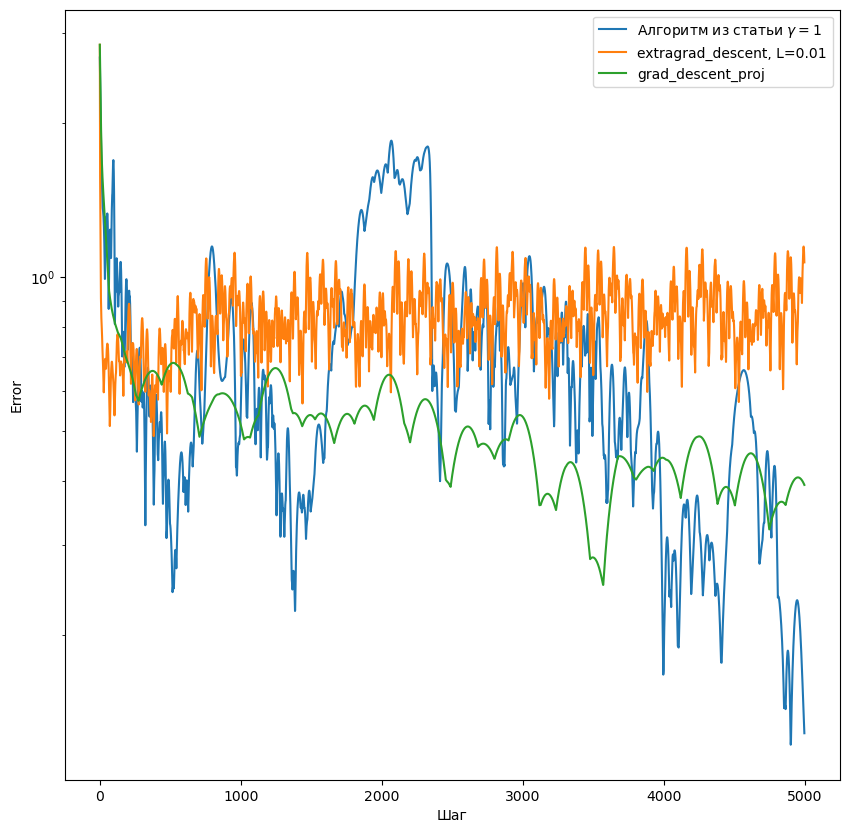

In [12]:
plt.figure(figsize=(10, 10))

criterion1=[]
x = PB_descent(0.1, iter_number)
plt.plot(np.array(range(len(criterion1))), criterion1, label='Алгоритм из статьи $\gamma = 1$')

criterion2=[]
x, y = extragrad_descent_2(0.01, iter_number)
plt.plot(np.array(range(len(criterion2))), criterion2, label="extragrad_descent, L=0.01")


criterion3=[]
x, y = grad_descent_proj_2(10**-3, iter_number)
plt.plot(np.array(range(len(criterion3))), criterion3, label="grad_descent_proj")

plt.xlabel("Шаг")
plt.ylabel("Error")
plt.legend()
plt.semilogy()

plt.show()

Алгоритм из статьи показал себя лучше остальных

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

xx = [i for i in range(10)]
X, Y = np.meshgrid(xx, xx)
Z = np.copy(B)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('строка')
ax.set_ylabel('столбец')
ax.set_zlabel('Probability')

plt.show()

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))

xx = [i for i in range(10)]
X1, Y1 = X2, Y2 = np.meshgrid(xx, xx)
Z1 = np.zeros((n, n))
Z2 = np.zeros((n, n))
for i in xx:
    for j in xx:
        Z1[i][j] = x[i*n + j]
        Z2[i][j] = y[i*n + j]

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X1, Y1, Z1)
ax.set_xlabel('строка')
ax.set_ylabel('столбец')
ax.set_zlabel('Probability')
ax.set_title('Вор')


plt.show()

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X2, Y2, Z2)
ax.set_xlabel('строка')
ax.set_ylabel('столбец')
ax.set_zlabel('Probability')
ax.set_title('Полицейский')

plt.show()

__Бонусные пункты__

__(г)__ Реализуйте методы из Секции 3 [работы](https://arxiv.org/pdf/1908.08465.pdf). Решите с помощью них Задачу 1. Добавьте сходимость на график из пункта (б) Задачи 1.

In [ ]:
#ответ

__(д)__ Реализуйте Алгоритм 1 и Алгоритм 2 из [работы](https://arxiv.org/pdf/2102.08352.pdf). Решите с помощью них Задачу 2 (могут помочь Секции 5 и 6 из упомянутой работы). Добавьте сходимость на график из пункта (в) Задачи 2, предварительно поменяв ось $x$ (что теперь будете откладывать по оси $x$?).

In [ ]:
#ответ